In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os


specs = {
    "num_sw_ports": n,
    "num_ToR" : 4,
    "qs_per_node" : 10,
    "bandwidth" : 2,
    "num_bsm_ir" : 2,
    "num_bsm_tel" : 2,
    "num_pd" : 1, # inactive
    "num_laser" : 1, # inactive
    "num_bs" : 1, # inactive
    "num_es" : 1 # inactive
}

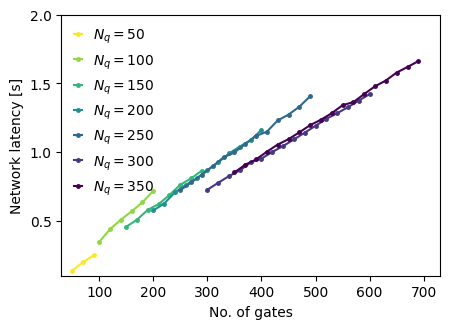

In [9]:
# n = 6
num_network_qubits = 360
num_qubits_list = np.arange(50,num_network_qubits+1,50)

# T_tel = [[0.3522000000000001, 0.4938500000000001, 0.6335200000000001],
#          [0.5746566666666666, 0.6928300000000002, 0.8089333333333335, 0.9202033333333337, 1.0398883333333335, 1.1572016666666662],
#          [0.6711402380952382, 0.7661921428571429, 0.8589730952380954, 0.9455000000000005, 1.0377392857142862, 1.1251676190476183, 1.2154509523809518, 1.3073258333333333],
#          [0.8314435714285707, 0.9137699999999999, 0.9954345238095234, 1.0762599999999996, 1.1602911904761901, 1.247417380952381, 1.3261165476190475, 1.4095105952380955, 1.4926247619047617, 1.5734132142857147, 1.660643333333334],
#          [0.969680555555556, 1.0512113888888885, 1.1245951984126983, 1.2051914682539684, 1.2863611904761907, 1.3657988888888895, 1.4400961111111112, 1.5238546031746034, 1.5969342857142856, 1.6724663888888889, 1.750111746031746, 1.8352063095238103, 1.9086382936507953],
#          [0.9666309307359306, 1.0307539249639248, 1.0979201190476193, 1.1630945238095236, 1.2253289790764796, 1.2927523051948049, 1.3533013816738815, 1.4131547546897552, 1.4813514574314581, 1.5427492135642131, 1.6113606096681097, 1.6733253787878783, 1.7358243578643582, 1.8013715187590194, 1.8622966594516601, 1.928724112554113],
#          [1.1174832611832617, 1.1813295815295817, 1.2477190187590197, 1.3074933261183268, 1.3728914213564216, 1.438611821789322, 1.50074981962482, 1.5626813852813854, 1.6317609163059172, 1.6857062301587302, 1.7483245959595957, 1.8143417460317464, 1.8768717893217888, 1.9453098737373735, 2.011530436507938, 2.0812987157287157, 2.1380531782106775, 2.1957726984126986]
#          ]

T_tel = [[0.13706360110190002, 0.19750298250630002, 0.24803797013589998],
        [0.34545000000000003, 0.4380833333333333, 0.5069333333333332, 0.5680833333333335, 0.63375, 0.7173166666666667],
        [0.4560821428571429, 0.5074595238095237, 0.5795845238095239, 0.6204254929815762, 0.6873238095238096, 0.7618416666666668, 0.8078345238095238, 0.8651523809523809],
        [0.5751535714285714, 0.624217857142857, 0.7059142857142857, 0.7599178571428571, 0.8072600167910998, 0.8680988095238092, 0.9239654761904761, 0.9892654761904762, 1.0394797619047618, 1.0857095238095238, 1.1603166666666667],
        [0.7212630952380952, 0.7784952380952379, 0.8350638888888888, 0.896363888888889, 0.9615023809523808, 0.9963611111111108, 1.057922222222222, 1.1167111111111108, 1.1475623015873013, 1.229499206349206, 1.2716198412698412, 1.329109126984127, 1.4052202380952379],
        [0.7252881313131313, 0.7759148629148629, 0.8245542568542568, 0.8657512265512267, 0.9239470418470417, 0.9521696248196247, 1.0002847763347762, 1.0431869047619047, 1.0913406204906202, 1.1405169913419915, 1.1904928210678212, 1.2413819985569987, 1.2818142135642137, 1.3260106782106784, 1.3742227272727274, 1.4212081890331891],
        [0.850917316017316, 0.907381746031746, 0.9457290404040405, 1.0018959235209235, 1.053919805194805, 1.0932196608946607, 1.1426348124098122, 1.1952043650793651, 1.2346969696969698, 1.2822696608946607, 1.340327489177489, 1.3628674963924965, 1.421651443001443, 1.47805284992785, 1.519834668109668, 1.5780335137085135, 1.6182806277056272, 1.6609089105339105]
        ]

y_color = np.linspace(0,1,len(T_tel))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.4))
for i_n, num_qubits in enumerate(num_qubits_list):
    # print(num_qubits)
    num_gates_list = np.arange(num_qubits,2*num_qubits+1,20)
    if i_n < len(T_tel):
        plt.plot(num_gates_list, T_tel[i_n],".-",markersize=5,color=colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")

# plt.xscale("log")
plt.ylim(0.1,2)
plt.yticks(np.arange(0.5,2.1,0.5))
plt.xlim(30,730)
plt.legend(handlelength=0.6, frameon=False)
plt.xlabel("No. of gates")
plt.ylabel("Network latency [s]")
plt.tight_layout()

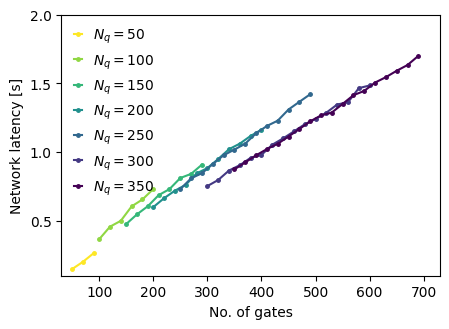

In [14]:
# n = 6
# no sorted dag
num_network_qubits = 360
num_qubits_list = np.arange(50,num_network_qubits+1,50)

T_tel = [
        [0.14841899788420002, 0.20098833864840007, 0.26430780311660007],
        [0.3650182340704, 0.45656164251783327, 0.4993933501244333, 0.6041983713362333, 0.6546184049184335, 0.7302133837066334],
        [0.47588124084949046, 0.5467294996606904, 0.6057281624024952, 0.6861368756004048, 0.729957635838719, 0.8107087971534094, 0.8408188431060095, 0.9078595238095237],
        [0.5986950335822001, 0.6638499999999998, 0.718597907516157, 0.7611880952380952, 0.843804761904762, 0.8829028739339572, 0.9486545573917239, 1.0201938431060094, 1.0607273517908808, 1.116772619047619, 1.1619843192964854],
        [0.7296884920634921, 0.8086369047619048, 0.8458213202145698, 0.9118616040926874, 0.9761108104418936, 1.0174507936507935, 1.0604895741828237, 1.135415476190476, 1.189131813026425, 1.2276373015873017, 1.3089107142857144, 1.3646905723466556, 1.41966249389966],
        [0.7518813732124563, 0.7962850889411722, 0.8652418831168832, 0.9039758297258297, 0.9573387445887448, 0.9787329965890799, 1.0529011183261185, 1.0987548339230835, 1.149564345795429, 1.20143234723843, 1.2397452621013454, 1.286155639642806, 1.3453469696969695, 1.3618404039086536, 1.4645702981763813, 1.4836447931258765],
        [0.873572498753582, 0.9241003246753247, 0.9756707671518503, 1.020911075036075, 1.0596481841792673, 1.1125742664303497, 1.1669590548340547, 1.222510930735931, 1.265881132624382, 1.2869016423590884, 1.3495261973897268, 1.4129957792207792, 1.4443733645544476, 1.5048477994227993, 1.5442977341862634, 1.590827910008993, 1.6325965367965367, 1.6991851370851372]
        ]

y_color = np.linspace(0,1,len(T_tel))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.4))
for i_n, num_qubits in enumerate(num_qubits_list):
    # print(num_qubits)
    num_gates_list = np.arange(num_qubits,2*num_qubits+1,20)
    if i_n < len(T_tel):
        plt.plot(num_gates_list, T_tel[i_n],".-",markersize=5,color=colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")

# plt.xscale("log")
plt.ylim(0.1,2)
plt.yticks(np.arange(0.5,2.1,0.5))
plt.xlim(30,730)
plt.legend(handlelength=0.6, frameon=False)
plt.xlabel("No. of gates")
plt.ylabel("Network latency [s]")
plt.tight_layout()

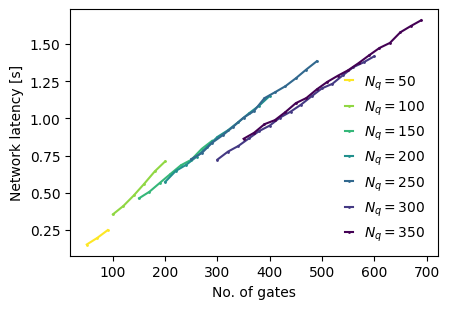

In [107]:
n = 6
num_ToR = 4
num_network_qubits = 360
num_qubits_list = np.arange(50,num_network_qubits+1,50)
# num_qubits_list = np.arange(50,301,50)
num_network_qubits = 360
num_bsm_tel = 2
num_bsm_ir = 2
Nrep = 28

y_color = np.linspace(0,1,len(num_qubits_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):
    num_gates_list = np.arange(num_qubits,2*num_qubits+1,20)
    latency_list = []
    fname = f"results/clos_T_vs_depth/q_{num_qubits}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}.json"
    # print(fname)
    if os.path.isfile(fname):
        with open(fname) as f:
            # vec = np.array(json.load(f))
            latency_depth_list = np.array(json.load(f))
            # latency_list += latency_depth_list[:,1].tolist()
            # depth_list += latency_depth_list[:,0].tolist()

    for latency_depth in latency_depth_list:
        latency_depth = np.array(latency_depth)
        latency_list.append(latency_depth[:,1].mean()) 

    plt.plot(num_gates_list,latency_list,".-",markersize=2,color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")

# plt.ylim(0.2,2.3)
# plt.xlim(30,730)
plt.legend(handlelength=0.6, frameon=False)
# plt.title(f"num_nir_bsm = {num_bsm_ir}", fontsize=11)
plt.xlabel("No. of gates")
plt.ylabel("Network latency [s]")
plt.tight_layout()
plt.show()



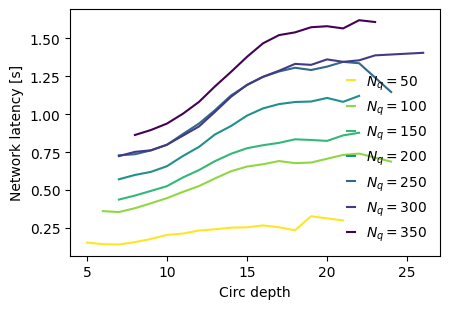

In [108]:
n = 6
num_ToR = 4
num_network_qubits = 360
num_qubits_list = np.arange(50,num_network_qubits+1,50)
# num_qubits_list = np.arange(50,301,50)
num_network_qubits = 360
num_bsm_tel = 2
num_bsm_ir = 2
Nrep = 28

y_color = np.linspace(0,1,len(num_qubits_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):
    latency_list = []
    depth_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_T_vs_depth/q_{num_qubits}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}_r_{i_rep}.json"
        # print(fname)
        if os.path.isfile(fname):
            with open(fname) as f:
                # vec = np.array(json.load(f))
                latency_depth_list = np.array(json.load(f))
                latency_list += latency_depth_list[:,1].tolist()
                depth_list += latency_depth_list[:,0].tolist()
                
            # print(len(latency_depth_list))
            # latency_depth_list = np.array(latency_depth_list)
        # print(vec)
        # # print(num_qubits)
        # T_tel_avg = []
        # T_tel_max = []
        # T_tel_min = []
        # for i_t, lat_dep in enumerate(latency_depth_list):  
    if len(depth_list)>0:
        # plt.plot(depth_list,latency_list,".",markersize=2,color= colors_bar[i_n,:])#
        depth_vals = sorted(list(set(depth_list)))
        depth_list = np.array(depth_list)
        latency_list = np.array(latency_list)     
        latency_avg = np.zeros(len(depth_vals))
        for i_c, circ_depth in enumerate(depth_vals):
            idx = np.argwhere(depth_list==circ_depth)[:,0]
            latency_avg[i_c] =  latency_list[idx].mean()

        # print(latency_list.shape)
        plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
            # plt.plot([num_bsm_list[i_t]]*len(T_tel), T_tel,".",markersize=4,color= f"C{i_n}")#,label=rf"$N_{{comm}}=${num_comm_q}")
        #     T_tel_avg.append(sum(T_tel)/len(T_tel))
        #     T_tel_max.append(max(T_tel))
        #     T_tel_min.append(min(T_tel))
        # plt.fill_between(num_bsm_list, T_tel_min,T_tel_max, facecolor= f"C{i_n}", alpha=0.5)
        # plt.plot(num_bsm_list, T_tel_avg, color= f"C{i_n}", label=rf"$N_{{comm}}=${num_comm_q}")

# plt.ylim(0.2,2.3)
# plt.xlim(30,730)
plt.legend(handlelength=0.6, frameon=False)
# plt.title(f"num_nir_bsm = {num_bsm_ir}", fontsize=11)
plt.xlabel("Circ depth")
plt.ylabel("Network latency [s]")
plt.tight_layout()
plt.show()



# New file saving scheme

/tmp/ipykernel_1034657/4045838719.py:43: RuntimeWarning: invalid value encountered in scalar divide
  latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)


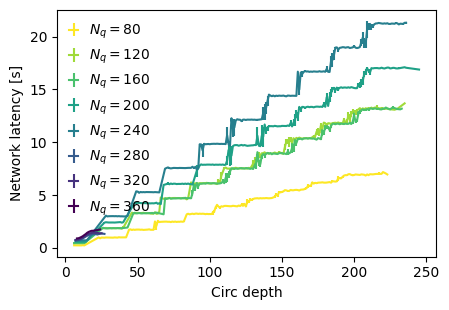

In [81]:
n = 6
num_ToR = 4
num_network_qubits = 360
num_qubits_list = np.arange(80,num_network_qubits+1,40)
# num_qubits_list = np.arange(80,360,40)
num_network_qubits = 360
num_bsm_tel = 2
num_bsm_ir = 2
Nrep = 28

y_color = np.linspace(0,1,len(num_qubits_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):
    latency_list = []
    depth_list = []
    num_g_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_T_vs_depth/q2_{num_qubits}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}_r_{i_rep}.json"
        # print(fname)
        if os.path.exists(fname):
            with open(fname) as f:
                latency_depth_list = np.array(json.load(f))
                # print(latency_depth_list.shape)
                num_g_list += latency_depth_list[:,0].tolist()
                depth_list += latency_depth_list[:,1].tolist()
                latency_list += latency_depth_list[:,2].tolist()
                # plt.plot(latency_depth_list[:,1],latency_depth_list[:,2],".",markersize=2, color= colors_bar[i_n,:])
    # num_g_list = np.reshape(np.array(num_g_list),(-1,)).tolist()
    # depth_list = np.reshape(np.array(depth_list),(-1,)).tolist()
    # latency_list = np.reshape(np.array(latency_list),(-1))

    if len(depth_list)>0:
        depth_vals = sorted(list(set(depth_list)))
        depth_list = np.array(depth_list)
        latency_list = np.array(latency_list)
        latency_avg = np.zeros(len(depth_vals))
        latency_std = np.zeros(len(depth_vals))
        for i_c, circ_depth in enumerate(depth_vals):
            idx = np.argwhere(depth_list==circ_depth)[:,0]
            latency_avg[i_c] =  latency_list[idx].mean()
            latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)

        # plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
        plt.errorbar(depth_vals, latency_avg,latency_std, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")

# plt.ylim(0.2,2.3)
# plt.xlim(30,730)
plt.legend(handlelength=0.6, frameon=False)
# plt.title(f"num_nir_bsm = {num_bsm_ir}", fontsize=11)
plt.xlabel("Circ depth")
plt.ylabel("Network latency [s]")
plt.tight_layout()
plt.show()



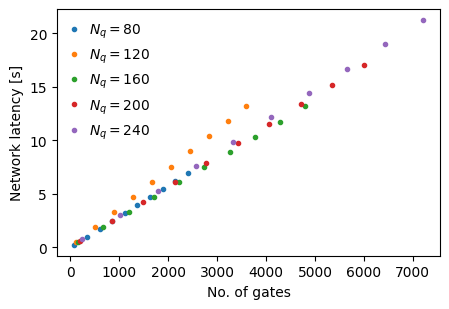

In [14]:
n = 6
num_ToR = 4
num_network_qubits = 360
# num_qubits_list = np.arange(80,num_network_qubits+1,40)
num_qubits_list = np.arange(80,280,40)
# num_qubits_list = [80,120]
num_network_qubits = 360
num_bsm_tel = 2
num_bsm_ir = 2
Nrep = 28

y_color = np.linspace(0,1,len(num_qubits_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):
    # plt.figure(figsize=(4.6,3.2))
    # num_gates_list = np.arange(num_qubits,2*num_qubits+1,20)
    # num_gates_list = np.arange(num_qubits,10*num_qubits+1,20)
    num_gates_list = np.linspace(num_qubits,30*num_qubits,10)

    latency_list = []
    depth_list = []
    num_g_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_T_vs_depth/q2_{num_qubits}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}_r_{i_rep}.json"
        # fname = f"results/clos_T_vs_depth/q_indep_{num_qubits}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                latency_depth_list = np.array(json.load(f))
                num_g_list += latency_depth_list[:,0].tolist()
                depth_list += latency_depth_list[:,1].tolist()
                latency_list += latency_depth_list[:,2].tolist()
    if len(depth_list)>0:
        latency_list = np.array(latency_list)
        latency_avg = np.zeros(len(num_gates_list))
        latency_std = np.zeros(len(num_gates_list))
        for i_g, num_gates in enumerate(num_gates_list):
            num_gates = int(num_gates) + 0.0
            idx = np.argwhere(np.array(num_g_list)==num_gates)[:,0]
            # print(idx)
            latency_avg[i_g] =  latency_list[idx].mean()
            latency_std[i_g] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)
        # print(latency_avg)

        # plt.plot(num_gates_list, latency_avg,".-", color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
        plt.plot(num_gates_list, latency_avg,".",label=rf"$N_q=${num_qubits}")
        # plt.errorbar(num_gates_list, latency_avg,latency_std, color= colors_bar[i_n,:], label=rf"$N_q=${num_qubits}")


plt.xlabel("No. of gates")
plt.ylabel("Network latency [s]")
plt.tight_layout()
plt.legend(handlelength=0.6, frameon=False)
plt.show()



/tmp/ipykernel_1124968/1819224794.py:49: RuntimeWarning: invalid value encountered in scalar divide
  latency_std_g[i_c] =  latency_list_g[idx].std()/np.sqrt(idx.shape[0]-1)
/tmp/ipykernel_1124968/1819224794.py:70: RuntimeWarning: invalid value encountered in scalar divide
  latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)


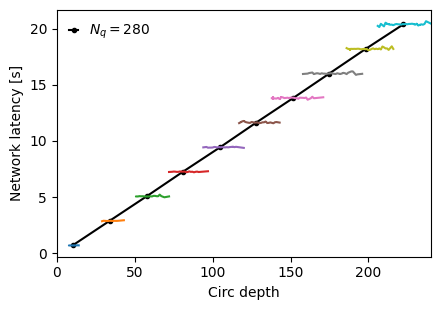

In [13]:
n = 6
num_ToR = 4
num_network_qubits = 360
# num_qubits_list = np.arange(80,num_network_qubits+1,40)
num_qubits_list = np.arange(80,281,40)
num_qubits_list = [280]
num_network_qubits = 360
num_bsm_tel = 2
num_bsm_ir = 2
Nrep = 28

y_color = np.linspace(0,1,len(num_qubits_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):
    # plt.figure(figsize=(4.6,3.2))
    # num_gates_list = np.arange(num_qubits,2*num_qubits+1,20)
    # num_gates_list = np.arange(num_qubits,10*num_qubits+1,20)
    num_gates_list = np.linspace(num_qubits,30*num_qubits,10)

    latency_list = []
    depth_list = []
    num_g_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_T_vs_depth/q2_{num_qubits}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}_r_{i_rep}.json"
        # fname = f"results/clos_T_vs_depth/q_indep_{num_qubits}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                latency_depth_list = np.array(json.load(f))
                num_g_list += latency_depth_list[:,0].tolist()
                depth_list += latency_depth_list[:,1].tolist()
                latency_list += latency_depth_list[:,2].tolist()

    if len(depth_list)>0:
        latency_avg_list = []
        depth_avg_list = []
        for num_gates in num_gates_list:
            num_gates = int(num_gates) + 0.0
            idx_g = np.argwhere(np.array(num_g_list)==num_gates)[:,0]
            depth_list_g = np.array(depth_list)[idx_g]
            latency_list_g = np.array(latency_list)[idx_g]      
            depth_vals_g = sorted(list(set(depth_list_g.tolist())))
            latency_avg_g = np.zeros(len(depth_vals_g))
            latency_std_g = np.zeros(len(depth_vals_g))
            for i_c, circ_depth in enumerate(depth_vals_g):
                idx = np.argwhere(depth_list_g==circ_depth)[:,0]
                latency_avg_g[i_c] =  latency_list_g[idx].mean()
                latency_std_g[i_c] =  latency_list_g[idx].std()/np.sqrt(idx.shape[0]-1)
        # # plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
            plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")
            # plt.title(rf"$N_q=${num_qubits}")
            # plt.ylim(0.2,0.5)
            # plt.xlim(5,22)
            plt.xlabel("Circ depth")
            plt.ylabel("Network latency [s]")
            plt.tight_layout()
            latency_avg_list.append(latency_list_g.mean())
            depth_avg_list.append(depth_list_g.mean())
        # plt.plot(depth_avg_list, latency_avg_list, ".-", color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
        plt.plot(depth_avg_list, latency_avg_list, "k.-",label=rf"$N_q=${num_qubits}")
        depth_vals = sorted(list(set(depth_list)))
        depth_list = np.array(depth_list)
        latency_list = np.array(latency_list)
        latency_avg = np.zeros(len(depth_vals))
        latency_std = np.zeros(len(depth_vals))
        for i_c, circ_depth in enumerate(depth_vals):
            idx = np.argwhere(depth_list==circ_depth)[:,0]
            latency_avg[i_c] =  latency_list[idx].mean()
            latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)

        # plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
        # plt.errorbar(depth_vals, latency_avg,latency_std, color= "black",label=rf"$N_q=${num_qubits}")

# plt.ylim(0,22)
plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
# plt.title("new algo")
plt.show()



# multi-tenancy

/tmp/ipykernel_1281141/595364842.py:44: RuntimeWarning: invalid value encountered in scalar divide
  latency_std_g[i_c] =  latency_list_g[idx].std()/np.sqrt(idx.shape[0]-1)
/tmp/ipykernel_1281141/595364842.py:66: RuntimeWarning: invalid value encountered in scalar divide
  latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)


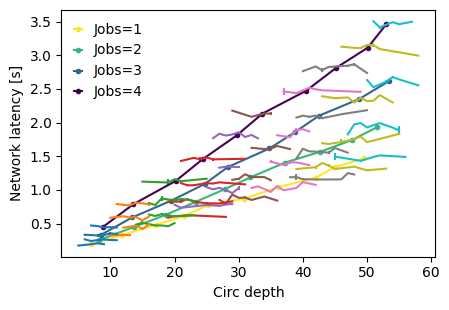

In [14]:
n = 4
num_ToR = 4
qs_per_node = 10
num_network_qubits = n**2//4 * num_ToR * qs_per_node
num_qubits_per_job = n**2//4 * qs_per_node
num_gates_list = np.linspace(num_qubits_per_job,8*num_qubits_per_job,10)
num_bsm_tel = 2
num_bsm_ir = 2
Nrep = 1

y_color = np.linspace(0,1,num_ToR)
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for num_jobs in range(1,num_ToR+1):
    num_gates_list = np.linspace(num_qubits_per_job,8*num_qubits_per_job,10)

    latency_list = []
    depth_list = []
    num_g_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_multidag_T_vs_depth/q_{num_jobs}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                latency_depth_list = np.array(json.load(f))
                num_g_list += latency_depth_list[:,0].tolist()
                depth_list += latency_depth_list[:,1].tolist()
                latency_list += latency_depth_list[:,2].tolist()

    if len(depth_list)>0:
        latency_avg_list = []
        depth_avg_list = []
        for num_gates in num_gates_list:
            num_gates = int(num_gates) + 0.0
            idx_g = np.argwhere(np.array(num_g_list)==num_gates)[:,0]
            depth_list_g = np.array(depth_list)[idx_g]
            latency_list_g = np.array(latency_list)[idx_g]      
            depth_vals_g = sorted(list(set(depth_list_g.tolist())))
            latency_avg_g = np.zeros(len(depth_vals_g))
            latency_std_g = np.zeros(len(depth_vals_g))
            for i_c, circ_depth in enumerate(depth_vals_g):
                idx = np.argwhere(depth_list_g==circ_depth)[:,0]
                latency_avg_g[i_c] =  latency_list_g[idx].mean()
                latency_std_g[i_c] =  latency_list_g[idx].std()/np.sqrt(idx.shape[0]-1)
        # # plt.plot(depth_vals, latency_avg, color= colors_bar[i_n,:],label=rf"$N_q=${num_qubits}")
            plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")
            # plt.title(rf"$N_q=${num_qubits}")
            # plt.ylim(0.2,0.5)
            # plt.xlim(5,22)
            plt.xlabel("Circ depth")
            plt.ylabel("Network latency [s]")
            plt.tight_layout()
            latency_avg_list.append(latency_list_g.mean())
            depth_avg_list.append(depth_list_g.mean())
        plt.plot(depth_avg_list, latency_avg_list, ".-", color= colors_bar[num_jobs-1,:],label=f"Jobs={num_jobs}")
        # plt.plot(num_gates_list, latency_avg_list, ".-", color= colors_bar[num_jobs-1,:],label=f"Jobs={num_jobs}")
        # plt.plot(depth_avg_list, latency_avg_list, ".-",label=rf"$N_j=${num_jobs}")
        depth_vals = sorted(list(set(depth_list)))
        depth_list = np.array(depth_list)
        latency_list = np.array(latency_list)
        latency_avg = np.zeros(len(depth_vals))
        latency_std = np.zeros(len(depth_vals))
        for i_c, circ_depth in enumerate(depth_vals):
            idx = np.argwhere(depth_list==circ_depth)[:,0]
            latency_avg[i_c] =  latency_list[idx].mean()
            latency_std[i_c] =  latency_list[idx].std()/np.sqrt(idx.shape[0]-1)


# plt.ylim(0,22)
# plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
# plt.title("new algo")
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


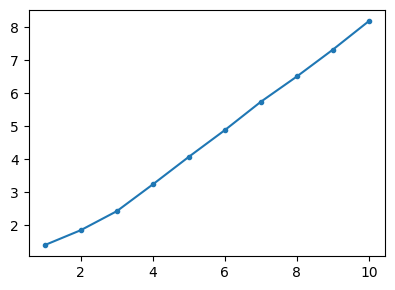

In [24]:
n = 4
num_ToR = 10
qs_per_node = 10
num_network_qubits = n**2//4 * num_ToR * qs_per_node
num_qubits_per_job = n**2//4 * qs_per_node
num_gates_list = [300]#np.linspace(num_qubits_per_job,8*num_qubits_per_job,10)
num_bsm_tel = 2
num_bsm_ir = 2
Nrep = 1

# num_jobs_list = range(1,8)
latency_vs_g = np.zeros(num_ToR)
for num_jobs in range(1,num_ToR+1):
# for num_jobs in range(1,9):
    # num_gates_list = np.linspace(num_qubits_per_job,8*num_qubits_per_job,10)
    num_gates_list = [300]
    latency_list = []
    depth_list = []
    num_g_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_multidag_T_vs_depth/q_{num_jobs}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_nir_{num_bsm_ir}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                latency_depth_list = np.array(json.load(f))
                num_g_list += latency_depth_list[:,0].tolist()
                depth_list += latency_depth_list[:,1].tolist()
                latency_list += latency_depth_list[:,2].tolist()

    if len(depth_list)>0:
        latency_avg_list = []
        depth_avg_list = []
        for num_gates in num_gates_list:
            num_gates = int(num_gates) + 0.0
            idx_g = np.argwhere(np.array(num_g_list)==num_gates)[:,0]
            depth_list_g = np.array(depth_list)[idx_g]
            latency_list_g = np.array(latency_list)[idx_g]
            latency_vs_g[num_jobs-1] = latency_list_g.mean()

plt.figure(figsize=(4.6,3.2))
plt.plot(range(1,num_ToR+1),latency_vs_g,".-")
# plt.ylim(0,22)
# plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
# plt.title("new algo")
plt.show()



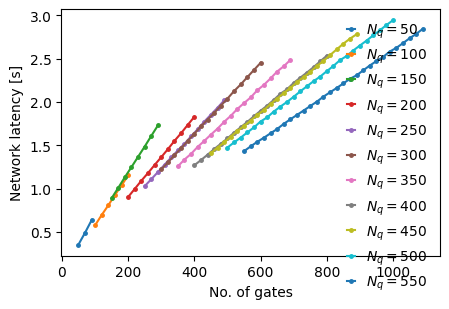

In [38]:
# n = 8
num_network_qubits = 640
num_qubits_list = np.arange(50,num_network_qubits+1,50)

T_tel = [[0.3535500000000001, 0.49094000000000015, 0.6369300000000002],
         [0.5745783333333335, 0.6938283333333334, 0.8058733333333338, 0.9244400000000003, 1.036063333333334, 1.1508683333333332],
         [0.8870607142857149, 1.0072748809523813, 1.1298954761904763, 1.24721, 1.3662720238095236, 1.4845211904761895, 1.6081415476190468, 1.7289813095238085],
         [0.9022152380952387, 0.9960413492063492, 1.0905690476190473, 1.1788220238095237, 1.2717270238095228, 1.3620978968253956, 1.454069642857142, 1.550374166666666, 1.6389693253968247, 1.7342649206349205, 1.8280088095238078],
         [1.0274599206349204, 1.1077805555555553, 1.1903283333333332, 1.2749028571428562, 1.358745833333333, 1.439176547619048, 1.5161968253968254, 1.60183503968254, 1.6842226984126984, 1.77256396825397, 1.8525201190476193, 1.9323376587301604, 2.0175213492063495],
         [1.2208442460317463, 1.3005224603174599, 1.3854345274170277, 1.4645692460317457, 1.54822996031746, 1.6327567460317456, 1.7173862698412703, 1.795059920634921, 1.8726177417027432, 1.956484646464648, 2.037740162337664, 2.1248126984127, 2.2011130952380955, 2.2855918686868697, 2.3683675396825405, 2.450536865079366],
         [1.2551618073593074, 1.3341515512265512, 1.3998494696969694, 1.4806716486291491, 1.5496217748917764, 1.6223323665223675, 1.6909178499278508, 1.7698958658008663, 1.8390522150072157, 1.9190342135642138, 1.9858253138528148, 2.050777987012987, 2.1339143362193367, 2.1958927849927856, 2.2704289898989902, 2.3504185389610397, 2.4111559704184717, 2.484500854978356],
         [1.2683468614718625, 1.3283402824952828, 1.3902790945165955, 1.4559538311688311, 1.5166422366522374, 1.5783981529581523, 1.6455445815295817, 1.7070167279942285, 1.7690700000000004, 1.8342838431013435, 1.8973781240981242, 1.9569366569541575, 2.023354924242425, 2.094313005050506, 2.145623026695526, 2.219128001443001, 2.279642492784992, 2.3383808838383833, 2.400712456709957, 2.4675194696969696, 2.532436727994228],
         [1.4085510364635363, 1.472761302308803, 1.5316762770562773, 1.5999583225108225, 1.6631725108225117, 1.7215362409812416, 1.7844662157287163, 1.8473126154401152, 1.9064678932178936, 1.974920805583306, 2.0368901731601734, 2.1025119336219347, 2.160213354978355, 2.2271785714285715, 2.2857170779220777, 2.3442784595959587, 2.4153244408369416, 2.4719563708513705, 2.5402816017316012, 2.605917622655122, 2.671875981240981, 2.7293883405483412, 2.7804373196248195],
         [1.4730445389332905, 1.5325012060162069, 1.5876439256576773, 1.6472053035853045, 1.7054539244089244, 1.77348742923743, 1.8211984100621603, 1.8884627124264624, 1.9458920315795325, 1.9995956782106787, 2.058964906204907, 2.1212696488233997, 2.1799996910034407, 2.238895882450882, 2.291570676823176, 2.354532685508935, 2.4150037498612495, 2.4819235020535, 2.529380759379508, 2.59318324064824, 2.6503110471472957, 2.7068616948329445, 2.767096619491618, 2.824959056499056, 2.8865821614496605, 2.942808214701964],
         [1.4309524214674214, 1.4861262266899768, 1.5391961994949497, 1.585977991036741, 1.6369869411144413, 1.6868701320901318, 1.746095046897547, 1.798679017649018, 1.8495271224608731, 1.8999114466089473, 1.9518351030913517, 2.0025430419580403, 2.0607416951104454, 2.1109743117993114, 2.160347764180264, 2.212913751526251, 2.2665116271228767, 2.30628257131757, 2.3636566196303685, 2.419958592241091, 2.470820134171384, 2.517988672299921, 2.5807995780608284, 2.622999172494173, 2.6774963461538466, 2.7338042001054506, 2.784982865884116, 2.84284977022977]
        ]
plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):
    # print(num_qubits)
    num_gates_list = np.arange(num_qubits,2*num_qubits+1,20)
    if i_n < len(T_tel):
        plt.plot(num_gates_list, T_tel[i_n],".-",markersize=5,label=rf"$N_q=${num_qubits}")

# plt.ylim(0.2,2.3)
# plt.xlim(30,730)
plt.legend(handlelength=0.6, frameon=False)
plt.xlabel("No. of gates")
plt.ylabel("Network latency [s]")
plt.tight_layout()

bsm_tel = 4

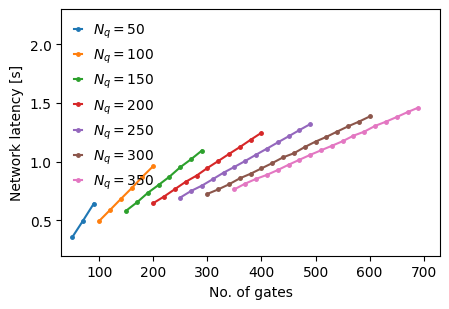

In [42]:
# n = 6
num_network_qubits = 640
num_qubits_list = np.arange(50,num_network_qubits+1,50)

T_tel = [
        [0.35551, 0.49706000000000033, 0.6432600000000004],
        [0.4957722619047618, 0.588719761904762, 0.6827807142857145, 0.774519285714286, 0.8724522619047618, 0.9628613095238099],
        [0.5837042274392277, 0.6547033671883676, 0.7352061136086137, 0.8029708355533355, 0.8727108533133535, 0.9536399866799867, 1.0214777011877012, 1.095493467088467],
        [0.6472818498168497, 0.7039913737651239, 0.7667356374181373, 0.8292500230325233, 0.8815842986180489, 0.9464198827561329, 1.0055133441558441, 1.0661927072927075, 1.124431321178821, 1.186756248889999, 1.2466402353202353],
        [0.6953858481795983, 0.7514266461806167, 0.7966372699277848, 0.8512094158455926, 0.9070338794620413, 0.9558002798671918, 1.0066917287287873, 1.0597487488736752, 1.1113190784460638, 1.1639266372271522, 1.2158658906371402, 1.2687978638191875, 1.32011565206852],
        [0.7260688075458218, 0.764420371606527, 0.8077210083857679, 0.8587085116812004, 0.8979635604975671, 0.9433204266556868, 0.9883546293931684, 1.0375418343948346, 1.0721064118475636, 1.1249441794888864, 1.1715075747689363, 1.2113083184086444, 1.2569230557961317, 1.3010961060902573, 1.3407765981697066, 1.3850343151288482],
        [0.7652061350178215, 0.8140106819443628, 0.8538900367117103, 0.8881704719796363, 0.9290267232915339, 0.9741356100257335, 1.016340298298828, 1.0581383003887015, 1.0970256017519742, 1.1354140621385056, 1.1744767183125908, 1.2216170897341987, 1.2559204592552087, 1.3049392517624312, 1.3407509308256917, 1.3805229993211459, 1.4222202682222467, 1.4608637274859269]
        ]
plt.figure(figsize=(4.6,3.2))
for i_n, num_qubits in enumerate(num_qubits_list):
    # print(num_qubits)
    num_gates_list = np.arange(num_qubits,2*num_qubits+1,20)
    if i_n < len(T_tel):
        plt.plot(num_gates_list, T_tel[i_n],".-",markersize=5,label=rf"$N_q=${num_qubits}")

plt.ylim(0.2,2.3)
plt.xlim(30,730)
plt.legend(handlelength=0.6, frameon=False)
plt.xlabel("No. of gates")
plt.ylabel("Network latency [s]")
plt.tight_layout()

# Varying number of BSMs

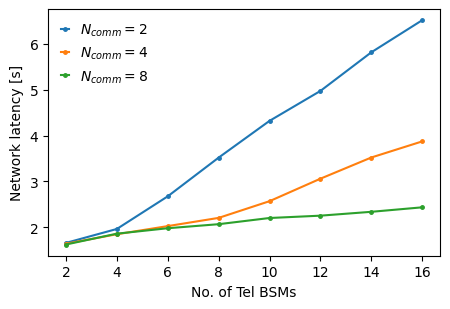

In [27]:
# n = 6
num_network_qubits = 360

num_bsm_list = np.arange(2,17,2)
num_comm_q_list = [2,4,8]

# T_tel = [
#         [0.8812944588744587, 0.5624700054769053, 0.5377710477769446, 0.5406038287962402, 0.5337137004692851, 0.5364032807729066, 0.5371684666388953, 0.5353793099994507],
#         [0.8708846103896103, 0.537855865448378, 0.4154272244532862, 0.3770688334780977, 0.3804722538718218, 0.37762677358444646, 0.3767169949310097, 0.3762110156924776],
#         [0.866505808080808, 0.5348078399332457, 0.41058686672969974, 0.3821611655820095, 0.37178206281947573, 0.379187899172846, 0.38745379091209065, 0.37024404886423257]
#         ]

# T_tel = [
#     [0.868411075036075, 0.5654774869366437, 0.5420225080766115, 0.5378713591733849, 0.5348430049592316, 0.5431519058991612, 0.5343158183640202, 0.5355673642984212],
#     [0.8677292207792208, 0.5358326845330901, 0.41415075066278817, 0.36777121229656196, 0.3681517893170013, 0.36073644843815195, 0.36753493700976747, 0.38518942947268303],
#     [0.8697443722943723, 0.5354754567191757, 0.4068298990676144, 0.3771260978763348, 0.36589956328656154, 0.36484011562286656, 0.3749004045366687, 0.3679176225302051]
# ]
# new eff code
T_tel = [
        [0.8885751803751804, 0.5635105495897292, 0.5331486321772164, 0.5414798669217626, 0.5439228017954462, 0.5313817859650933, 0.5408910028338167, 0.5374002269766194],
        [0.8788610028860029, 0.5304928843508835, 0.4036644809861003, 0.3391495968340349, 0.32333033581579756, 0.3268116174766636, 0.32746852618351047, 0.3193635999190608],
        [0.8698177849927851, 0.5340383441798254, 0.3943928463434341, 0.3180097626336861, 0.27713102518076904, 0.24063884012495018, 0.21729184824423128, 0.20075431854394843]
        ]
plt.figure(figsize=(4.6,3.2))
for i_n, num_comm_q in enumerate(num_comm_q_list):
    # print(num_qubits)
    if i_n < len(T_tel):
        plt.plot(num_bsm_list, num_bsm_list**0.9 *T_tel[i_n],".-",markersize=5,label=rf"$N_{{comm}}=${num_comm_q}")

# plt.ylim(0.2,2.3)
# plt.xlim(30,730)
plt.legend(handlelength=0.6, frameon=False)
plt.xlabel("No. of Tel BSMs")
plt.ylabel("Network latency [s]")
plt.tight_layout()



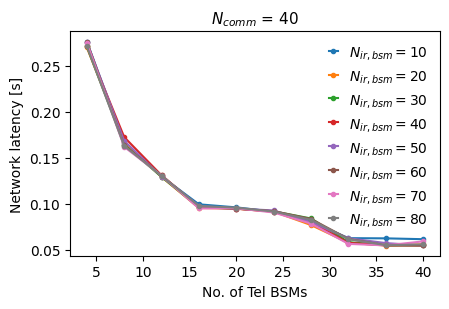

In [79]:
n = 4
num_ToR = 4
num_bsm_ir = 20
num_network_qubits = 360

# num_bsm_list = np.arange(2,17,2)
# num_comm_q_list = [2,4,8]
# num_ir_bsm_list = np.arange(4,21,4)
num_ir_bsm_list = np.arange(10,81,10)
# num_tel_bsm_list = np.arange(2,31,2) # Nq = 10
num_tel_bsm_list = np.arange(4,41,4) # Nq = 20
num_comm_q_list = [40]

# y_color = np.linspace(0,1,len(num_comm_q_list))
# colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_r, num_bsm_ir in enumerate(num_ir_bsm_list):
    for i_n, num_comm_q in enumerate(num_comm_q_list):
        JSON_PATH = f"results/bsm_sw/clos_{n}_{num_ToR}_nir_{num_bsm_ir}_comm_{num_comm_q}.json"
        with open(JSON_PATH) as f:
            # vec = np.array(json.load(f))
            latency_list = json.load(f)
        # print(vec)
        # # print(num_qubits)
        T_tel_avg = []
        T_tel_max = []
        T_tel_min = []
        for i_t, T_tel in enumerate(latency_list):        
            # plt.plot([num_bsm_list[i_t]]*len(T_tel), T_tel,".",markersize=4,color= colors_bar[i_n,:])#,label=rf"$N_{{comm}}=${num_comm_q}")
            # plt.plot([num_bsm_list[i_t]]*len(T_tel), T_tel,".",markersize=4,color= f"C{i_n}")#,label=rf"$N_{{comm}}=${num_comm_q}")
            T_tel_avg.append(sum(T_tel)/len(T_tel))
            T_tel_max.append(max(T_tel))
            T_tel_min.append(min(T_tel))
        # plt.fill_between(num_bsm_list, T_tel_min,T_tel_max, facecolor= f"C{i_n}", alpha=0.15)
        # plt.plot(num_tel_bsm_list, (n**2/4 *num_bsm_ir+3*n/2*num_tel_bsm_list)*T_tel_avg,".-", color= f"C{i_r}", label=rf"$N_{{comm}}=${num_comm_q}")
        # plt.plot(num_tel_bsm_list, (n**2/4 *num_bsm_ir+3*n/2*num_tel_bsm_list)*T_tel_avg,".-", color= f"C{i_r}", label=rf"$N_{{ir,bsm}}=${num_bsm_ir}")
        plt.plot(num_tel_bsm_list, T_tel_avg,".-", color= f"C{i_r}", label=rf"$N_{{ir,bsm}}=${num_bsm_ir}")

# plt.ylim(0.2,2.3)
# plt.xlim(30,730)
# plt.xscale("log")
plt.legend(handlelength=0.6, frameon=False)
# plt.title(f"num_nir_bsm = {num_bsm_ir}", fontsize=11)
plt.title(rf"$N_{{comm}}$ = {num_comm_q}", fontsize=11)
plt.xlabel("No. of Tel BSMs")
plt.ylabel("Network latency [s]")
plt.tight_layout()
plt.show()



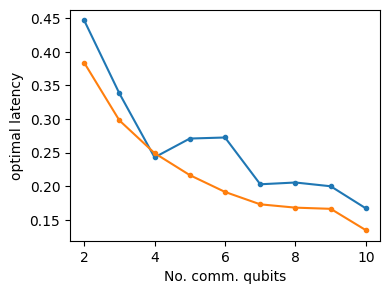

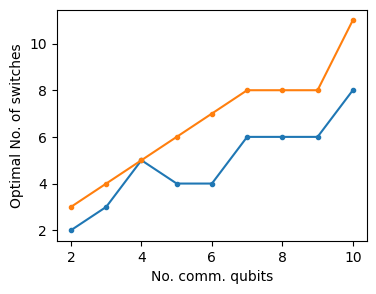

In [134]:
n = 4
num_ToR = 4
num_network_qubits = 360

# num_bsm_list = np.arange(2,17,2)
# num_comm_q_list = [2,4,8]
# num_ir_bsm_list = np.arange(4,21,4)
num_ir_bsm_list = [4,10]
num_tel_bsm_list = np.arange(2,21,1) 
num_comm_q_list =  np.arange(2,11,1)

# y_color = np.linspace(0,1,len(num_comm_q_list))
# colors_bar = plt.cm.viridis_r(y_color)

T_tel_mat = []
# plt.figure(10,figsize=(4.6,3.2))
for i_r, num_bsm_ir in enumerate(num_ir_bsm_list):
    T_opt = []
    tel_sw_opt = []
    for i_n, num_comm_q in enumerate(num_comm_q_list):
        JSON_PATH = f"results/bsm_sw/clos_{n}_{num_ToR}_nir_{num_bsm_ir}_comm_{num_comm_q}.json"
        with open(JSON_PATH) as f:
            # vec = np.array(json.load(f))
            latency_list = json.load(f)
        # print(vec)
        # # print(num_qubits)
        T_tel_avg = []
        T_tel_max = []
        T_tel_min = []
        for i_t, T_tel in enumerate(latency_list):        
            # plt.plot([num_bsm_list[i_t]]*len(T_tel), T_tel,".",markersize=4,color= colors_bar[i_n,:])#,label=rf"$N_{{comm}}=${num_comm_q}")
            # plt.plot([num_bsm_list[i_t]]*len(T_tel), T_tel,".",markersize=4,color= f"C{i_n}")#,label=rf"$N_{{comm}}=${num_comm_q}")
            T_tel_avg.append(sum(T_tel)/len(T_tel))
            T_tel_max.append(max(T_tel))
            T_tel_min.append(min(T_tel))
        cost = (n**2/4 *num_bsm_ir+3*n/2*num_tel_bsm_list)*T_tel_avg
        T_tel_mat.append(cost)
        idx_min = np.argmin(cost)
        T_opt.append(T_tel_avg[idx_min])
        tel_sw_opt.append(num_tel_bsm_list[idx_min])
        # # plt.fill_between(num_bsm_list, T_tel_min,T_tel_max, facecolor= f"C{i_n}", alpha=0.15)
        # plt.plot(num_tel_bsm_list,cost,".-", color= f"C{i_n}", label=rf"$N_{{comm}}=${num_comm_q}")
        # # plt.plot(num_tel_bsm_list, T_tel_avg,".-", color= f"C{i_n}", label=rf"$N_{{comm}}=${num_comm_q}")
    # print(T_opt)
    plt.figure(3, figsize=(4,3))
    plt.plot(num_comm_q_list,T_opt,".-", label=rf"$N_{{ir,bsm}}=${num_bsm_ir}")
    plt.ylabel("optimal latency")
    plt.xlabel("No. comm. qubits")
    plt.figure(4, figsize=(4,3))
    plt.plot(num_comm_q_list,tel_sw_opt,".-")
    plt.ylabel("Optimal No. of switches")
    plt.xlabel("No. comm. qubits")
# # plt.ylim(0.11,0.46)
# # plt.xlim(30,730)
# # plt.xscale("log")
# # plt.legend(handlelength=0.6, frameon=False)
# plt.title(f"num_nir_bsm = {num_bsm_ir}", fontsize=11)
# # plt.title(rf"$N_{{comm}}$ = {num_comm_q}", fontsize=11)
# plt.xlabel("No. of Tel BSMs")
# plt.ylabel("Network latency [s]")
# plt.tight_layout()
# plt.show()

# X, Y = np.meshgrid(num_tel_bsm_list, num_comm_q_list)

# pos = plt.pcolormesh(X, Y, T_tel_mat, cmap='Reds_r', vmin=5, vmax=20)

# plt.xlabel("No. of Tel BSMs")
# plt.ylabel("No. of Comm. qubits")

# # pos=plt.imshow( T_tel_mat, cmap='viridis', vmin=0, vmax=20,
#                              interpolation='none')


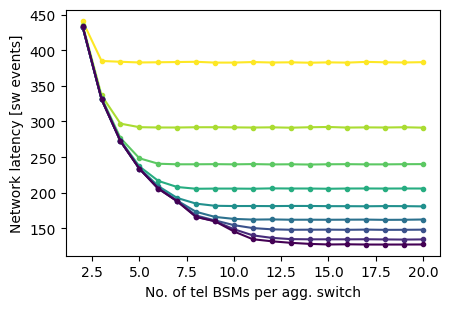

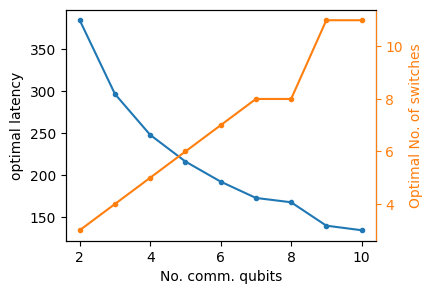

In [188]:
Nrep = 28
n = 4
num_ToR = 4
num_network_qubits = 360

# num_bsm_list = np.arange(2,17,2)
# num_comm_q_list = [2,4,8]
# num_ir_bsm_list = np.arange(4,21,4)
num_ir_bsm_list = [10]
num_tel_bsm_list = np.arange(2,21,1) 
num_comm_q_list =  np.arange(2,11,1)

y_color = np.linspace(0,1,len(num_comm_q_list))
colors_bar = plt.cm.viridis_r(y_color)

T_tel_mat = []
plt.figure(10,figsize=(4.6,3.2))
for i_r, num_bsm_ir in enumerate(num_ir_bsm_list):
    T_opt = []
    tel_sw_opt = []
    for i_n, num_comm_q in enumerate(num_comm_q_list):
        T_tel_avg = np.zeros(num_tel_bsm_list.shape[0])
        Nrep_counter = 0
        for i_rep in range(Nrep):
            fname = f"results/bsm_sw/clos_{n}_{num_ToR}_nir_{num_bsm_ir}_comm_{num_comm_q}_r_{i_rep}.json"
            if os.path.exists(fname):
                Nrep_counter += 1
                with open(fname) as f:
                    T_tel_avg += np.array(json.load(f)).mean(axis=1)

        T_tel_avg /= Nrep_counter
        cost = (n**2/4 *num_bsm_ir+n*num_tel_bsm_list)*T_tel_avg
        T_tel_mat.append(cost)
        idx_min = np.argmin(cost)
        T_opt.append(T_tel_avg[idx_min])
        tel_sw_opt.append(num_tel_bsm_list[idx_min])
        # plt.plot(num_tel_bsm_list*n/(n**2 // 4* num_ToR),T_tel_avg,".-", color= f"C{i_n}", label=rf"$N_{{comm}}=${num_comm_q}")
        # plt.plot(num_tel_bsm_list*n/(n**2 // 4* num_ToR*num_comm_q),T_tel_avg,".-", color= f"C{i_n}", label=rf"$N_{{comm}}=${num_comm_q}")
        # plt.plot(num_tel_bsm_list,cost,".-", color= f"C{i_n}", label=rf"$N_{{comm}}=${num_comm_q}")
        # plt.plot(num_tel_bsm_list,cost,".-", color= colors_bar[i_n,:], label=rf"$N_{{comm}}=${num_comm_q}")
        plt.plot(num_tel_bsm_list,1e3*T_tel_avg,".-", color= colors_bar[i_n,:], label=rf"$N_{{comm}}=${num_comm_q}")
        # plt.title(f"num_nir_bsm = {num_bsm_ir}", fontsize=11)
        # plt.title(rf"$N_{{comm}}$ = {num_comm_q}", fontsize=11)
        # plt.legend()
        plt.xlabel("No. of tel BSMs per agg. switch")
        plt.ylabel("Network latency [sw events]")
        # plt.ylabel("cost")
        plt.tight_layout()

    # plt.figure(3, figsize=(4,3))
    # plt.plot(num_comm_q_list,T_opt,".-", label=rf"$N_{{ir,bsm}}=${num_bsm_ir}")
    # plt.ylabel("optimal latency")
    # plt.xlabel("No. comm. qubits")
    # plt.figure(4, figsize=(4,3))
    # plt.plot(num_comm_q_list,tel_sw_opt,".-")
    # plt.ylabel("Optimal No. of switches")
    # plt.xlabel("No. comm. qubits")

    fig, ax1 = plt.subplots(figsize=(4,3))

    ax2 = ax1.twinx()
    ax1.plot(num_comm_q_list, 1e3*np.array(T_opt), '.-', color = "C0")
    c2 = "C1"
    ax2.plot(num_comm_q_list, tel_sw_opt, '.-', color = c2)

    ax1.set_xlabel('No. comm. qubits')
    ax1.set_ylabel('optimal latency')#, color='C0')
    ax2.set_ylabel('Optimal No. of switches', color=c2)
    ax2.spines['right'].set_color(c2)
    # ax2.yaxis.label.set_color('C1')
    ax2.tick_params(axis='y', colors=c2)



# QFT

Text(0, 0.5, 'Network latency [s]')

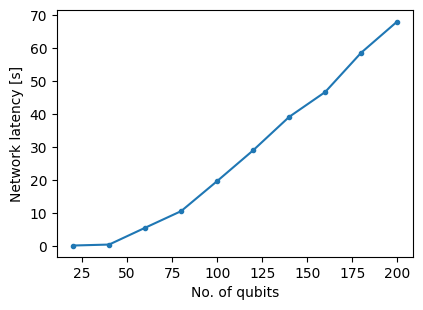

In [28]:
T_tel = [3.5060179658810005, 5.469040438501334, 7.867217630085667, 10.517627403862335, 15.735929498184667, 19.634897251814333]
num_qubits_list = np.arange(50,101+1,10)

T_tel = [0.07862940974400001, 0.371268504984, 5.469040438501334, 10.517627403862335, 19.634897251814333, 28.971562159954, 39.118283969740666, 46.66037627902353, 58.59740301735972, 68.05825890286373]
num_qubits_list = np.arange(20,201+1,20)

plt.figure(figsize=(4.6,3.2))
plt.plot(num_qubits_list,T_tel,".-")

plt.xlabel("No. of qubits")
plt.ylabel("Network latency [s]")
